In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import sys

node_columns = ["Node Id","X","Y"]
nodes_data = pd.read_csv("https://users.cs.utah.edu/~lifeifei/research/tpq/OL.cnode", header=None, delimiter=r"\s+")
nodes_data.columns = node_columns
nodes_data.head()

edge_columns = ["Edge Id","X","Y","Weight"]
edges_data = pd.read_csv("https://users.cs.utah.edu/~lifeifei/research/tpq/OL.cedge", header=None, delimiter=r"\s+")
edges_data.columns = edge_columns
edges_data.head()

,Edge Id,X,Y,Weight
0,0,1609,1622,57.403187
1,1,2471,2479,29.718756
2,2,2463,2471,61.706902
3,3,2443,2448,19.080025
4,4,1417,1491,28.248583


In [5]:
def create_s_d():
    sr_dt = 20
    return sr_dt

def create_clusters():
    clst_no = int(input("Enter the no.of clusters:"))
    for i in range(clst_no):
        name = input("Enter the name of cluster ")
        cluster.append(name)
    for k in range(clst_no):
        print("Cluster: ",cluster[k])
        e = int(input("Enter the no.of nodes:"))
        clusters_cnt.append(e)

def traversal(sr_dt):
    clusters.append("Source")
    clusters.extend(cluster)
    clusters.append("Destination")
       
    cluster_cnt.append(sr_dt)
    cluster_cnt.extend(clusters_cnt)
    cluster_cnt.append(sr_dt)
    
#     print(clusters)
#     print(cluster_cnt)

def findMax(mat, N):
        maxElement = -sys.maxsize - 1
        for i in range(N):
            for j in range(N):
                if (mat[i][j] > maxElement):
                    maxElement = mat[i][j]
        return maxElement

def shortest_path(G, node):
    length, path = nx.single_source_dijkstra(G, node)
    return length, path
    

def graph_construction():
    import numpy as np
    import pandas as pd
    import sys
    import time
    
    clusters1 = []
    for i in clusters:
        if(i!="Source" and i!="Destination"):
            clusters1.append(i)
    
    j = 0
    for cl_cnt in cluster_cnt:
        i = 0
        while(i<cl_cnt):
            x = np.random.randint(len(nodes_data))
            if(G.nodes[x]["Role"]==""):
                G.nodes[x]["Role"]=clusters[j]
                i = i + 1
            else:
                continue
        j = j + 1

    n_w_r_c = 0
    for i in list(G.nodes):
        if(G.nodes[i]["Role"]!=""):
            n_w_r_c = n_w_r_c + 1
    #print("Nodes Participating:",n_w_r_c)

    dict1 = {}
    path_weights = []
    dummy = {}
    
    st_time = time.time()
    
    for i in list(G.nodes):
        if(G.nodes[i]["Role"] in clusters1):
            #print("For Node: ",i," and Role: ",G.nodes[i]["Role"])
            dict1, dummy = shortest_path(G, i)
            path_weights.append(dict1)
    
    n_rols = []             # ADDING DESTINATION NODE OT CREATE K+2 PARTITE GRAPH
    for i in list(G.nodes):
        if(G.nodes[i]["Role"] in clusters1):
            n_rols.append(i)
    
    data_paths = pd.DataFrame(path_weights,index=n_rols)
    data_paths.to_csv("Graph11.csv")
    
    G1 = nx.Graph()
    
    for i in list(G.nodes):
        if(G.nodes[i]["Role"]!=""):
            G1.add_node(i)
            G1.nodes[i]["Role"] = G.nodes[i]["Role"]

    for i in list(G1.nodes):
        for j in n_rols:
            if(i!=j):
                for k in range(0,len(clusters)):
                    if(k+1<len(clusters)):
                        if(G1.nodes[i]["Role"]==clusters[k] and G1.nodes[j]["Role"]==clusters[k+1]):
                            G1.add_edge(i,j,weight=data_paths[i][j])

    for i in n_rols:
        for j in list(G1.nodes):
            for k in (len(clusters)-2,len(clusters)):
                if(k+1<len(clusters)):
                    if(G1.nodes[i]["Role"]==clusters[k] and G1.nodes[j]["Role"]==clusters[k+1]):
                        G1.add_edge(i,j,weight=data_paths[j][i])
    
    
    dict1 = {}
    for i in list(G1.nodes):
        ind_data = []
        for j in list(G1.nodes):
            if(G1.get_edge_data(i,j)!=None):
                ind_data.append(G1.get_edge_data(i,j)["weight"])
            else:
                ind_data.append(-1)
        dict1[i] = ind_data
    n_rols1 = []
    for i in G1.nodes():
        n_rols1.append(i)
   
    data = pd.DataFrame(dict1,index=n_rols1)
    data.to_csv("Graph21.csv")
    
    dict_1 = {}
    dict_11 = {}
    dict_paths_1 = []
    path_weights_1 = []
    a_1 = []
    for i in list(G1.nodes):
        if(G1.nodes[i]["Role"]==clusters[1]):
            a_1.append(i)
            dict_1, dict_11 = shortest_path(G1, i)
            path_weights_1.append(dict_1)
            dict_paths_1.append(dict_11)
            
    
    datapw = pd.DataFrame(path_weights_1,index=a_1)
    datapl = pd.DataFrame(dict_paths_1,index=a_1)
    
    #print("(K+2)-partite graph",nx.info(G1))

    clusters2 = [clusters[0],clusters[1],clusters[len(clusters)-2],clusters[len(clusters)-1]]
    G2 = nx.Graph()
    for i in list(G1.nodes):
        if(G1.nodes[i]["Role"] in clusters2):
            G2.add_node(i)
            G2.nodes[i]["Role"] = G1.nodes[i]["Role"]

    #print("4-partite graph",nx.info(G2))    
    f_two = []
    cnt = 0
    while(cnt<2):
        f_two.append(clusters[cnt])
        cnt = cnt + 1

    l_two = []
    cnt = len(clusters)-1
    while(cnt>=len(clusters)-2):
        l_two.append(clusters[cnt])
        cnt = cnt - 1

    for i in list(G2.nodes):
        for j in list(G2.nodes):
            if(i!=j):
                if(G2.nodes[i]["Role"]==f_two[0] and G2.nodes[j]["Role"]==f_two[1]):
                    G2.add_edge(i,j,weight=data[j][i])

    for i in list(G2.nodes):
        for j in list(G2.nodes):
            if(i!=j):
                if(G2.nodes[i]["Role"]==l_two[1] and G2.nodes[j]["Role"]==l_two[0]):
                    G2.add_edge(i,j,weight=data[j][i])

    
    source_weights = []
    
    for k in range(len(a_1)):
        source_weights=path_weights_1[k]
        #print(source_weights)
        for i in source_weights:
            if(G.nodes[a_1[k]]["Role"]==clusters2[1] and G.nodes[i]["Role"]==clusters2[2]):
                #print(a_1[k],i,source_weights[i])
                G2.add_edge(a_1[k],i,weight=source_weights[i])
    
    #print("final 4-partite graph",nx.info(G2))
    
    n_rols2 = []
    for i in list(G2.nodes):
        if(G2.nodes[i]["Role"] in clusters2):
            n_rols2.append(i)
    
    
    # G2.get_edge_data(i,j)["weight"]
    
    
    dict1 = {}
    for i in list(G2.nodes):
        ind_data = []
        for j in list(G2.nodes):
            if(G2.get_edge_data(i,j)!=None):
                ind_data.append(G2.get_edge_data(i,j)["weight"])
            else:
                ind_data.append(-1)
        dict1[i] = ind_data

    n_rols2 = []
    for i in list(G2.nodes):
        n_rols2.append(i)
    data_2 = pd.DataFrame(dict1,index=n_rols2)
    #print(data_2)
    data_2.to_csv("Graph31.csv")
    
    S = []
    D = []
    A = []
    DP = []
    for i in G2.nodes:
        if(G2.nodes[i]["Role"] == clusters[0]):
            S.append(i)
    for i in G2.nodes:
        if(G2.nodes[i]["Role"] == clusters[len(clusters)-1]):
            D.append(i)
    for i in G2.nodes:
        if(G2.nodes[i]["Role"] == clusters[1]):
            A.append(i)
    for i in G2.nodes:
        if(G2.nodes[i]["Role"] == clusters[len(clusters)-2]):
            DP.append(i)
    dict2 = {}
    
    for i in A:
        for j in DP:
            result = []
            for k in range(len(S)):
                result.append(data_2[S[k]][i] + data_2[i][j] + data_2[j][D[k]]) 
            dict2[str(i)+":"+str(j)] = result
            
    data_3 = pd.DataFrame(dict2,index=S)
    data_3.head()
    data_3.to_csv("Graph41.csv")
 
    
    s_index = list(data_3.columns)
    size = len(s_index)
    flag = 0
    p = 0
    pareto=[]
    while( p != size):
        q =0
        while(q != size):
            if(q == p):
                q=q+1
                continue
            flag1 = 1
            for s in S:
                if(data_3[s_index[p]][s] >= data_3[s_index[q]][s]):
                    flag = 0
                else:
                    flag = 1
                    break
                if(data_3[s_index[p]][s] > data_3[s_index[q]][s]):
                    flag1 = 0
            if(flag == 0 and flag1 == 0):
                size = size-1
                data_3 = data_3.drop([s_index[p]],axis=1)
                s_index.remove(s_index[p])
                p = p - 1
                break
            else:
                if( q == ( size -1 ) ):
                    pareto.append(s_index[p])
                if(q == ( (size) - 2 ) and p == ( (size) -1 )  ):
                    pareto.append(s_index[p])
            q = q+1
        p = p+1
     

    M  = np.zeros( (len(S), len(S)), np.int64)
    maximum =[]
    for p in pareto:
        for b1,elem1 in enumerate(S):
            for b2,elem2 in enumerate(S):
                if(b2 > b1):
                    M[b1][b2] = abs(data_3[p][elem1] - data_3[p][elem2])
        maximum.append(findMax(M,len(S)))
    
#     val = (pd.Series(maximum).idxmin())  
#     eps = pareto[val]

#     PO_path_with_epsilon_envy = 0
#     for i in S:
#         PO_path_with_epsilon_envy += data_3[eps][i]
#     print(PO_path_with_epsilon_envy)
    
#     data_3.to_csv("final.csv")
#     col_sums = {}
#     opt_sum = []
#     for i in s_index:    
#         opt_sum.append(data_3[i].sum())
#         col_sums[i] = data_3[i].sum()

#     OPT_path_length = min(opt_sum) 
#     print("optimal path length A:", OPT_path_length)
        
    #eps1 = maximum[val]
    eps1 = 5000
    #print("maximum value of eps", eps1)
    ep = []
    opt_cost_paths=[]
    
    for i in range(0,10):
        ep.append(eps1)
        eps_opt_cost=[]
        for j in range(0,len(maximum)):
            if(maximum[j] <= eps1):
                eps_opt_cost.append(j)
        opt_cost_paths.append(eps_opt_cost)
        eps1 = eps1 + 1000 
    
    all_path_lengths=[]
    for ele in opt_cost_paths:
        path_length=[]
        for x in ele:
            tmp=0 
            for s in S:
                tmp += data_3[pareto[x]][s]
            path_length.append(tmp)
            
        all_path_lengths.append(path_length)
    
#     print("optimal path length",all_path_lengths)
    opt_path_length =[]
    for each in all_path_lengths:
        if (len(each)!= 0):
            opt_path_length.append(min(each))
        else:
            opt_path_length.append(0)
    #print("optimal path length",min(opt_path_length))
    return opt_path_length, ep

    
            
    
#     import matplotlib.pyplot as plt
#     plt.xlabel("Epsilon")
#     plt.ylabel("Cost of Optimal Paths with Epsilon Envy")
#     plt.plot(ep,opt_path_length)
#     plt.show()
        



#print(nx.info(G))
opt_path_length = []

    
ep = []
for i in range(0,100):
    print(i+1,end = " ")
    G = nx.Graph()

    for i in list(nodes_data["Node Id"]):
        G.add_node(i, pos=(nodes_data["X"][i], nodes_data["Y"][i]))
        G.nodes[i]["Id"] = i
        G.nodes[i]["Role"] = ""
    
    for i in list(edges_data["Edge Id"]):
        G.add_edge(edges_data["X"][i], edges_data["Y"][i], weight=edges_data["Weight"][i])
    
    opt =[]
    cluster = ['a','b','c','d']
    clusters_cnt = [10,20,30,40]
    clusters = []
    cluster_cnt = []    
    #create_clusters()
    #sr_dt = create_s_d()
    sr_dt = 20
    traversal(sr_dt)
    opt,ep = graph_construction()
    opt_path_length.append(opt)
    for i in list(nodes_data["Node Id"]):
        if(G.nodes[i]["Role"] != ""):
            G.nodes[i]["Role"] = " "


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [6]:
opt = pd.DataFrame(opt_path_length)
opt.columns = ep
opt.to_csv("epsilon.csv")
opt.head(60)

,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000
0,0.000000,176457.082376,176457.082376,176457.082376,176457.082376,176457.082376,176457.082376,176457.082376,176457.082376,176457.082376
1,0.000000,0.000000,0.000000,275017.211391,203573.688071,200980.492200,182591.036135,182591.036135,182591.036135,182591.036135
2,0.000000,0.000000,231462.955157,210739.966065,210739.966065,189245.578526,184180.581422,184180.581422,184180.581422,184180.581422
3,0.000000,0.000000,147515.169848,147515.169848,147515.169848,147515.169848,147515.169848,147515.169848,147515.169848,147515.169848
4,0.000000,134857.913849,134857.913849,134857.913849,134857.913849,134857.913849,134857.913849,134857.913849,134857.913849,134857.913849
5,0.000000,0.000000,0.000000,181271.406319,181271.406319,181271.406319,181271.406319,181271.406319,181271.406319,181271.406319
6,0.000000,0.000000,0.000000,0.000000,137712.270301,137712.270301,137712.270301,137712.270301,137712.270301,137712.270301
7,0.000000,0.000000,0.000000,140754.693943,140754.693943,140754.693943,140754.693943,140754.693943,140754.693943,140754.693943
8,0.000000,0.000000,0.000000,0.000000,210032.235492,150227.393736,150227.393736,150227.393736,150227.393736,150227.393736
9,0.000000,0.000000,0.000000,189206.053032,148810.724398,148810.724398,148810.724398,148810.724398,148810.724398,148810.724398


In [17]:
params = {'legend.fontsize': '15',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'22',
          'font.weight': '500',
           'axes.linewidth':2,
          'figure.titlesize':'xx-large',
         'ytick.labelsize':'20'}

plt.rcParams.update(params)

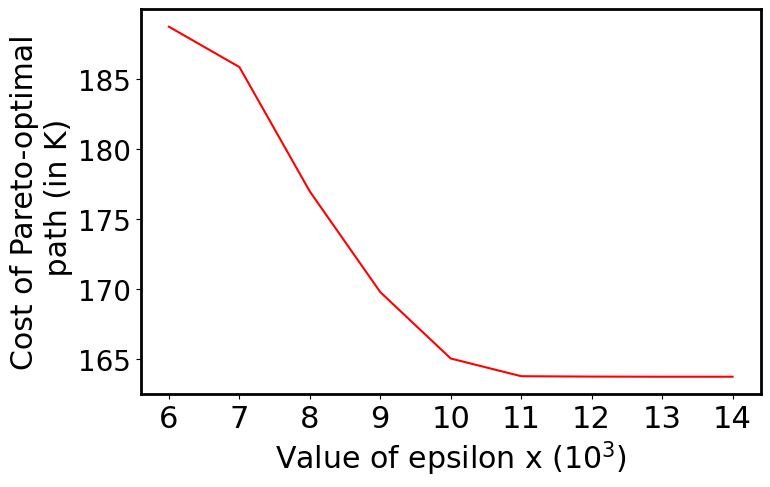

In [18]:
rows = opt.index
cols = opt.columns
cnt = 0

avgs = []

for i in cols:
    elems = []
    if(i!=cols[0]):
        for j in rows:
            if(opt[i][j]!=0):
                elems.append(opt[i][j])
    else:
        continue
    avgs.append(np.mean(elems))

import matplotlib.pyplot as plt

f=plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

plt.rc('font', size=15) 
plt.xlabel("Value of epsilon x $(10^3)$")
plt.ylabel("Cost of Pareto-optimal\n path (in K)")
plt.xticks([6,7,8,9,10,11,12,13,14])
plt.plot(np.array(cols[1:len(cols)])/1000,np.array(avgs)/1000,color="red",label='avg')
plt.show()